In [ ]:
#uploading the data
from zipfile import ZipFile

file_name = "/content/gender-classification-dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
batch_size = 32
img_height = 200
img_width = 200

In [ ]:
data_dir="/content/Training"

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  subset="training",
  validation_split=0.0001,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 47009 files belonging to 2 classes.
Using 47005 files for training.


In [ ]:
valid_dir="/content/Validation"

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  valid_dir,
  subset="validation",
  validation_split=0.999999,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11649 files belonging to 2 classes.
Using 11648 files for validation.


In [ ]:
train_ds

<BatchDataset shapes: ((None, 200, 200, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
val_ds

<BatchDataset shapes: ((None, 200, 200, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
class_names = train_ds.class_names
print(class_names)

['female', 'male']


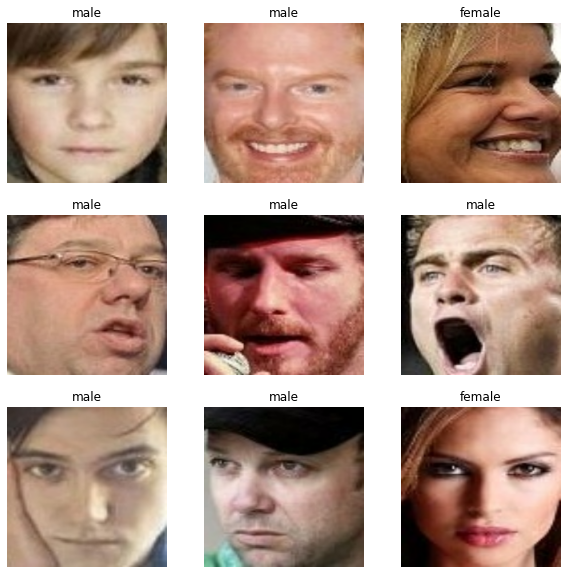

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(2000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
val_ds=val_ds.map(lambda x, y: (tf.cast(x, tf.float16), tf.cast(x, tf.int16)))
train_ds=train_ds.map(lambda x, y: (tf.cast(x, tf.float16), tf.cast(x, tf.int16)))

In [ ]:
val_ds

<MapDataset shapes: ((None, 200, 200, 3), (None, 200, 200, 3)), types: (tf.float16, tf.int16)>

In [ ]:
train_ds

<MapDataset shapes: ((None, 200, 200, 3), (None, 200, 200, 3)), types: (tf.float16, tf.int16)>

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Dropout(0.1),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 32)        0

In [ ]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
num_classes = 2
Simplemodel = tf.keras.Sequential([                     
    layers.Flatten(input_shape=(img_height, img_width, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes)
])

In [ ]:
Simplemodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
Simplemodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 120000)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               15360128  
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 258       
Total params: 15,360,386
Trainable params: 15,360,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NEW_train_ds= train_ds.shard(num_shards=5, index=0)
NEW_val_ds = val_ds.shard(num_shards=5, index=0)

In [ ]:
num_training_examples = 0
num_validation_examples = 0

for example in NEW_train_ds:
    num_training_examples += 1

for example in NEW_val_ds:
    num_validation_examples += 1

In [ ]:
num_training_examples

In [ ]:
num_validation_examplesNEW_val_ds

In [ ]:
epochs=5
history = Simplemodel.fit(
  NEW_train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: ignored